In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:\\Users\\Admin\\Downloads\\ACB.csv')
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df.sort_values('Date', inplace=True)

In [3]:
df['Close'] = df['Close'].str.replace(',', '').astype(float)


In [4]:
df.set_index('Date', inplace=True)




In [5]:
train_size = int(len(df) * 0.9)
train, test = df.iloc[:train_size], df.iloc[train_size:]


In [6]:
model = ExponentialSmoothing(train['Close'], seasonal='add', seasonal_periods=12)
result = model.fit(optimized=True, use_brute=True, method='L-BFGS-B')


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [7]:
predictions = result.forecast(len(test))



c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [8]:
forecast_steps = 30
predictions_30_days = result.forecast(steps=forecast_steps)


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [9]:
mae = mean_absolute_error(test['Close'], predictions)
rmse = np.sqrt(mean_squared_error(test['Close'], predictions))
mape = np.mean(np.abs((test['Close'] - predictions) / test['Close'])) * 100

# In kết quả
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

Mean Absolute Error (MAE): 2744.15
Root Mean Squared Error (RMSE): 2828.04
Mean Absolute Percentage Error (MAPE): nan%


C:\Users\Admin\AppData\Local\Temp\ipykernel_9716\750055148.py:3: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  mape = np.mean(np.abs((test['Close'] - predictions) / test['Close'])) * 100


In [10]:
from datetime import timedelta

In [11]:
last_test_date = pd.to_datetime(test.index[-1])

# Tính toán ngày bắt đầu cho 30 ngày tiếp theo
start_date_30_days = last_test_date + timedelta(days=1)

# Tạo DataFrame cho 30 ngày tiếp theo
index_30_days = pd.date_range(start=start_date_30_days, periods=forecast_steps)
df_30_days = pd.DataFrame({'predicted_mean': predictions_30_days}, index=index_30_days)




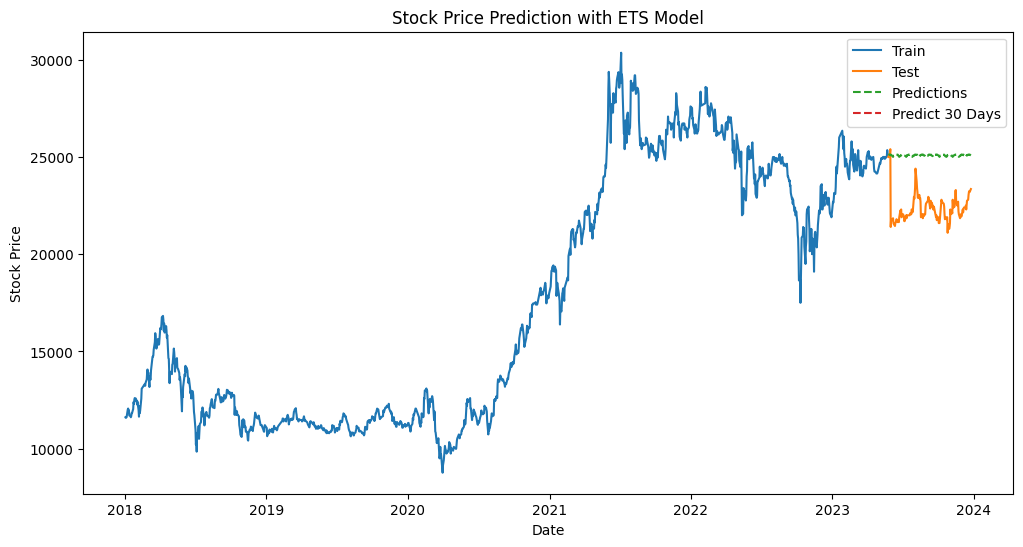

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Close'], label='Train')
plt.plot(test.index, test['Close'], label='Test')
plt.plot(test.index, predictions, label='Predictions', linestyle='--')
plt.plot(df_30_days.index, df_30_days['predicted_mean'], label='Predict 30 Days', linestyle='--')
plt.title('Stock Price Prediction with ETS Model')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()